In [ ]:
!nvidia-smi

Mon Oct 12 15:18:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

Packages
=======================

In [20]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import numpy as np
import seaborn as sns

Import MNIST dataset and handle with it
==============================

In [2]:
from tensorflow.keras.datasets import mnist
(X_train_numpy, Y_train_numpy), (X_test_numpy, Y_test_numpy) = mnist.load_data()

In [3]:
print(f"x_train's shape is {X_train_numpy.shape}\n x_test's shape is {X_test_numpy.shape}\n \
y_train's shape is {Y_train_numpy.shape}\n y_test's shape is {Y_test_numpy.shape}")

x_train's shape is (60000, 28, 28)
 x_test's shape is (10000, 28, 28)
 y_train's shape is (60000,)
 y_test's shape is (10000,)


In [19]:
label = list(set(Y_test_numpy))
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

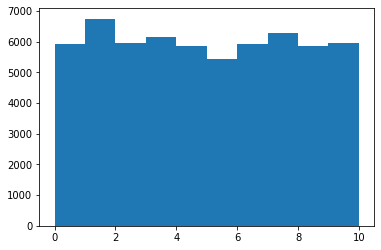

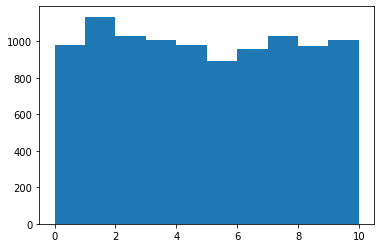

In [27]:
plt.hist(Y_train_numpy, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.show()
plt.hist(Y_test_numpy, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.show()

numpy -> pytorch and divide 255

In [6]:
X_train = torch.div(torch.from_numpy(X_train_numpy).type(torch.FloatTensor), 255)[0:12000, 0:28, 0:28].cuda()
X_test = torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 255)[0:2000].cuda()
Y_train = torch.from_numpy(Y_train_numpy).type(torch.long)[0:12000].cuda()
Y_test = torch.from_numpy(Y_test_numpy).type(torch.long)[0:2000].cuda()

print(f"{X_train.size()} : {X_test.size()}\n {Y_train.size()} : {Y_test.size()}")

torch.Size([12000, 28, 28]) : torch.Size([2000, 28, 28])
 torch.Size([12000]) : torch.Size([2000])


MLP
==================

*   Input is input layer
*   the first Linear Layer is the first hidden layer
*   the last Linear Layer is the output layer

MLP1
---------------------
empty shell

In [7]:
class MLP1(nn.Module):
    def __init__(self):
        super(MLP1, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            # ('do1', nn.Dropout(0.5)),
            # ('fc1', nn.Linear(28 * 28, 50)),  # hidden layer1
            # ('bn1', nn.BatchNorm1d(50)),
            # ('relu1', nn.ReLU()),
            # ('do2', nn.Dropout(0.5)),
            # ('fc2', nn.Linear(50, 30)),  # hidden layer2
            # ('bn2', nn.BatchNorm1d(30)),
            # ('relu2', nn.ReLU()),
            # ('do3', nn.Dropout(0.5)),
            # ('fc3', nn.Linear(30, 10)), # output layer
            # ('softmax1', nn.Softmax(dim=1))
        ]))
        # self.fc1   = nn.Linear(28 * 28, 1500)
        # self.fc2   = nn.Linear(1500, 10)
        self.ce = nn.CrossEntropyLoss()
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.model(x)
        return x

    # x.size(0) = y.size(0)
    def loss(self, x, y):
        loss = self.ce(x, y)
        return loss


MLP2
-------------------

In [ ]:
class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(28 * 28, 50)),  # hidden layer1
            ('relu1', nn.ReLU()),
            ('fc2', nn.Linear(50, 30)),  # hidden layer2
            ('relu2', nn.ReLU()),
            ('fc3', nn.Linear(30, 10)), # output layer
            ('softmax1', nn.Softmax(dim=1))
        ]))
        self.ce = nn.CrossEntropyLoss()
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.model(x)
        return x

    # x.size(0) = y.size(0)
    def loss(self, x, y):
        loss = self.ce(x, y)
        return loss


how to modify the layer (don't run)
----------------------------
move mlp1 to gpu

In [ ]:
mlp1 = MLP1().cuda()
print(mlp1)

MLP1(
  (model): Sequential()
  (ce): CrossEntropyLoss()
)


forward and loss

In [ ]:
out = mlp1(X_train)
loss = mlp1.loss(out, Y_train)

move mlp1 back to cpu

In [ ]:
mlp1.cpu()

MLP1(
  (model): Sequential(
    (fc1): Linear(in_features=784, out_features=100, bias=True)
    (relu1): ReLU()
    (fc2): Linear(in_features=100, out_features=200, bias=True)
    (relu2): ReLU()
    (fc3): Linear(in_features=200, out_features=10, bias=True)
    (softmax1): Softmax(dim=1)
  )
  (ce): CrossEntropyLoss()
)

modify layers

In [ ]:
mlp1.model.fc1 = nn.Linear(28 * 28, 200)
mlp1.model.fc2 = nn.Linear(200, 200 + 100)
mlp1.model.fc3 = nn.Linear(200 + 100, 10)

move it back to gpu

In [ ]:
mlp1.cuda()

MLP1(
  (model): Sequential(
    (fc1): Linear(in_features=784, out_features=200, bias=True)
    (relu1): ReLU()
    (fc2): Linear(in_features=200, out_features=300, bias=True)
    (relu2): ReLU()
    (fc3): Linear(in_features=300, out_features=10, bias=True)
    (softmax1): Softmax(dim=1)
  )
  (ce): CrossEntropyLoss()
)

do forward and loss

In [ ]:
out = mlp1(X_train)
loss = mlp1.loss(out, Y_train)

AVG
======================
calculate average loss and correct

In [ ]:
# class Avg_para():
#     def __init__(self, m):
#         self.m = m
#         self.para_list = []
#         self.times = 0
    
#     def init_para(self):
#         for para in self.m.parameters():
#             self.para_list.append(torch.zeros_like(para.data))

#     def update_para(self):
#         self.times += 1
#         for (para_sum, para) in zip(self.para_list, self.m.parameters()):
#             para_sum.add_(para.data)

#     def reload_para(self):
#         for (para_sum, para) in zip(self.para_list, self.m.parameters()):
#             para.data = para_sum.div_(self.times)

In [9]:
# x, y,
def avg(m, x, y, x_test, y_test, epochs = 2000, times=15, isgpu=True):
    avg_loss = 0
    avg_corr = 0
    avg_test_corr = 0
    epochs = epochs
    
    # try multiple times to get average
    for time in range(times):
        # reset parameters
        for layer in m.model:
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()
        optimizer = optim.SGD(m.parameters(), lr=0.1, momentum=0.1)
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = m(x)
            loss = m.loss(out, y)
            loss.backward()
            optimizer.step()  # updates parameters

        # accumulate loss, corr, test_corr
        # accuracy
        out = m(x)
        pred = out.data.max(1, keepdim=False)[1]
        if isgpu: 
            correct = pred.eq(y.data.view_as(pred)).cpu().detach().sum()
        else: 
            correct = pred.eq(y.data.view_as(pred)).detach().sum()
        correct_rate = correct.detach().item() / x.size()[0]
        avg_corr += correct_rate
        # loss
        avg_loss += loss.item()
        # accuracy test
        out_test = m(x_test)
        pred_test = out_test.data.max(1, keepdim=False)[1]
        if isgpu:
            correct_test = pred_test.eq(y_test.data.view_as(pred_test)).cpu().detach().sum()
        else:
            correct_test = pred_test.eq(y_test.data.view_as(pred_test)).detach().sum()
        avg_test_corr += correct_test.detach().item() / x_test.size()[0]

    return avg_loss / times, avg_corr / times, avg_test_corr / times

test

In [ ]:
mlp2 = MLP2().cuda()

In [ ]:
loss, corr, corr_test = avg(mlp2, X_train, Y_train, X_test, Y_test)

In [ ]:
corr, corr_test

(0.8658777777777779, 0.8264999999999999)

Execute
===============


explore batch normalization and dropout on cpu
---------------------

no batch normalization

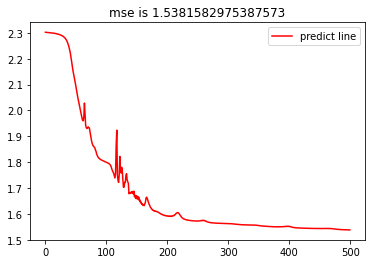

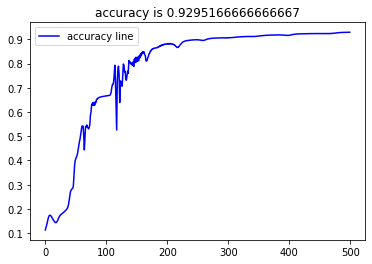

In [ ]:
mlp2 = MLP2()
epoch = 500
optimizer = optim.SGD(mlp2.parameters(), lr=1)
epoch_list = []
loss_list = []
accu_list = []

while(epoch > 0):
    optimizer.zero_grad()
    out = mlp2(torch.div(torch.from_numpy(X_train_numpy).type(torch.FloatTensor), 255))
    loss = mlp2.loss(out, torch.from_numpy(Y_train_numpy).type(torch.long))
    loss.backward()
    optimizer.step()  # updates parameters

    pred = out.data.max(1, keepdim=False)[1]
    correct = pred.eq(torch.from_numpy(Y_train_numpy).type(torch.long).data.view_as(pred)).detach().sum()
    correct_rate = correct.detach().item() / X_train_numpy.shape[0]

    epoch_list.append((500-epoch))
    loss_list.append(loss.item())
    accu_list.append(correct_rate)

    epoch -= 1

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse is {loss}")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=accu_list, color='blue', label='accuracy line', ax=ax)
plt.title(f"accuracy is {correct_rate}")
plt.show()

In [ ]:
out = mlp2(torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 255))
pred = out.data.max(1, keepdim=False)[1]
correct = pred.eq(torch.from_numpy(Y_test_numpy).type(torch.long).data.view_as(pred)).detach().sum()
correct_rate = correct.detach().item() / X_test_numpy.shape[0]
correct_rate

0.9262

add batch normalization

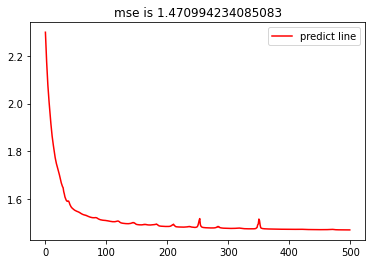

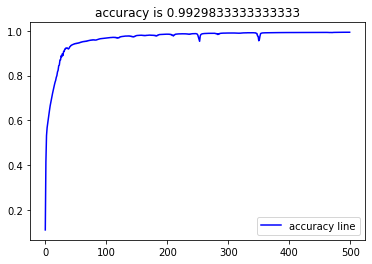

In [ ]:
mlp2 = MLP2()
mlp2.model = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(28 * 28, 50)),  # hidden layer1
            ('bn1', nn.BatchNorm1d(50)),
            ('relu1', nn.ReLU()),
            ('fc2', nn.Linear(50, 30)),  # hidden layer2
            ('bn2', nn.BatchNorm1d(30)),
            ('relu2', nn.ReLU()),
            ('fc3', nn.Linear(30, 10)), # output layer
            ('softmax1', nn.Softmax(dim=1))
        ]))
epoch = 500
optimizer = optim.SGD(mlp2.parameters(), lr=1)
epoch_list = []
loss_list = []
accu_list = []

while(epoch > 0):
    optimizer.zero_grad()
    out = mlp2(torch.div(torch.from_numpy(X_train_numpy).type(torch.FloatTensor), 255))
    loss = mlp2.loss(out, torch.from_numpy(Y_train_numpy).type(torch.long))
    loss.backward()
    optimizer.step()  # updates parameters

    pred = out.data.max(1, keepdim=False)[1]
    correct = pred.eq(torch.from_numpy(Y_train_numpy).type(torch.long).data.view_as(pred)).detach().sum()
    correct_rate = correct.detach().item() / X_train_numpy.shape[0]

    epoch_list.append((500-epoch))
    loss_list.append(loss.item())
    accu_list.append(correct_rate)

    epoch -= 1

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse is {loss}")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=accu_list, color='blue', label='accuracy line', ax=ax)
plt.title(f"accuracy is {correct_rate}")
plt.show()

In [ ]:
out = mlp2(torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 255))
pred = out.data.max(1, keepdim=False)[1]
correct = pred.eq(torch.from_numpy(Y_test_numpy).type(torch.long).data.view_as(pred)).detach().sum()
correct_rate = correct.detach().item() / X_test_numpy.shape[0]
correct_rate

0.9737

add dropout

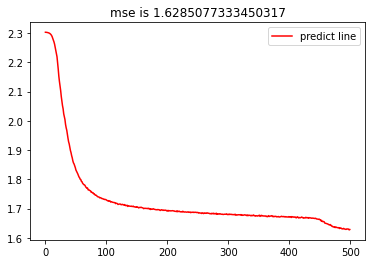

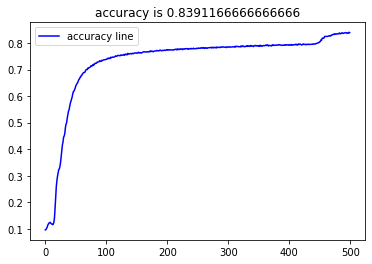

In [ ]:
mlp2 = MLP2()
mlp2.model = nn.Sequential(OrderedDict([
            ('do1', nn.Dropout(0.5)),
            ('fc1', nn.Linear(28 * 28, 50)),  # hidden layer1
            # ('bn1', nn.BatchNorm1d(50)),
            ('relu1', nn.ReLU()),
            ('do2', nn.Dropout(0.5)),
            ('fc2', nn.Linear(50, 30)),  # hidden layer2
            # ('bn2', nn.BatchNorm1d(30)),
            ('relu2', nn.ReLU()),
            ('do3', nn.Dropout(0.5)),
            ('fc3', nn.Linear(30, 10)), # output layer
            ('softmax1', nn.Softmax(dim=1))
        ]))
epoch = 500
optimizer = optim.SGD(mlp2.parameters(), lr=1, momentum=0.9)
epoch_list = []
loss_list = []
accu_list = []

while(epoch > 0):
    optimizer.zero_grad()
    out = mlp2(torch.div(torch.from_numpy(X_train_numpy).type(torch.FloatTensor), 255))
    loss = mlp2.loss(out, torch.from_numpy(Y_train_numpy).type(torch.long))
    loss.backward()
    optimizer.step()  # updates parameters

    pred = out.data.max(1, keepdim=False)[1]
    correct = pred.eq(torch.from_numpy(Y_train_numpy).type(torch.long).data.view_as(pred)).detach().sum()
    correct_rate = correct.detach().item() / X_train_numpy.shape[0]

    epoch_list.append((500-epoch))
    loss_list.append(loss.item())
    accu_list.append(correct_rate)

    epoch -= 1

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse is {loss}")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=accu_list, color='blue', label='accuracy line', ax=ax)
plt.title(f"accuracy is {correct_rate}")
plt.show()

In [ ]:
out = mlp2(torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 255))
pred = out.data.max(1, keepdim=False)[1]
correct = pred.eq(torch.from_numpy(Y_test_numpy).type(torch.long).data.view_as(pred)).detach().sum()
correct_rate = correct.detach().item() / X_test_numpy.shape[0]
correct_rate

0.8409

width of layer1
---------------------------------------
check from 50 nodes to 1050 nodes, without dropout

in 50: loss is 1.4876728455225627, accu is 0.985927777777778
in 150: loss is 1.4759305159250895, accu is 0.9930333333333333
in 250: loss is 1.4730625708897909, accu is 0.9949111111111113
in 350: loss is 1.4715265830357869, accu is 0.9957666666666667
in 450: loss is 1.4711052656173706, accu is 0.9960166666666667
in 550: loss is 1.47015274365743, accu is 0.9964999999999997
in 650: loss is 1.4694874127705893, accu is 0.9968111111111112
in 750: loss is 1.4690489927927652, accu is 0.9970666666666667
in 850: loss is 1.4690577824910482, accu is 0.9970555555555555
in 950: loss is 1.4684519608815512, accu is 0.9974611111111111



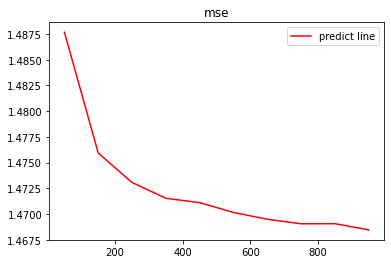

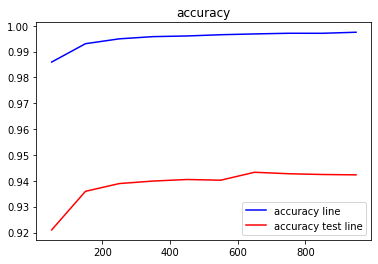

In [26]:
from tqdm.notebook import tnrange, tqdm_notebook

width_list = []
loss_list = []
correct_list = []
correct_test_list = []
mlp1 = MLP1() # on cpu


for width in tnrange(50, 1050, 100, desc='width'):
    
    # change the width of the layer
    mlp1.cpu() # move to cpu to prepare for the modification of layers
    mlp1.model = nn.Sequential(OrderedDict([
        ('fc1', nn.Linear(28 * 28, width)),  # hidden layer1
        ('bn1', nn.BatchNorm1d(width)),
        ('relu1', nn.ReLU()),
        ('fc2', nn.Linear(width, 30)),  # hidden layer2
        ('bn2', nn.BatchNorm1d(30)),
        ('relu2', nn.ReLU()),
        ('fc3', nn.Linear(30, 10)), # output layer
        ('softmax1', nn.Softmax(dim=1))
        ]))
    mlp1.cuda() # move back to gpu
    
    loss, correct_rate, correct_test = avg(mlp1, X_train, 
                                           Y_train, X_test, Y_test, epochs = 1000, times=15)
            
    print(f"in {width}: loss is {loss}, accu is {correct_rate}")
    width_list.append(width)
    loss_list.append(loss)
    correct_list.append(correct_rate)
    correct_test_list.append(correct_test)

fig, ax = plt.subplots()
sns.lineplot(x=width_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=width_list, y=correct_list, color='blue', label='accuracy line', ax=ax)
sns.lineplot(x=width_list, y=correct_test_list, color='red', label='accuracy test line', ax=ax)
plt.title(f"accuracy")
plt.show()

width of layer2
-----------------------
check from 50 nodes to 1050 nodes, with dropout

in 50: loss is 1.5555582841237385, accu is 0.9332166666666667
in 150: loss is 1.5248587608337403, accu is 0.9609055555555555
in 250: loss is 1.5165866136550903, accu is 0.9667166666666667
in 350: loss is 1.5121911605199179, accu is 0.9708555555555556
in 450: loss is 1.5092968543370564, accu is 0.9731666666666665
in 550: loss is 1.5077365318934122, accu is 0.9745555555555557
in 650: loss is 1.5050639073053995, accu is 0.9763666666666668
in 750: loss is 1.5033098300298056, accu is 0.9779944444444445
in 850: loss is 1.5010986089706422, accu is 0.9793944444444446
in 950: loss is 1.500843381881714, accu is 0.9798111111111111



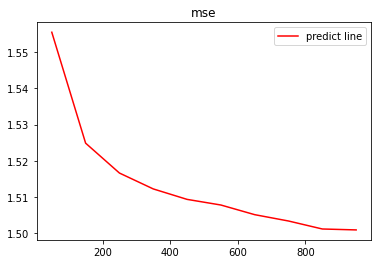

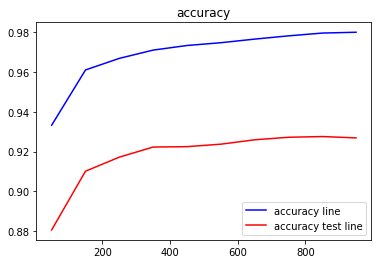

In [25]:
from tqdm.notebook import tnrange, tqdm_notebook

width_list = []
loss_list = []
correct_list = []
correct_test_list = []
mlp1 = MLP1() # on cpu


for width in tnrange(50, 1050, 100, desc='width'):
    
    # change the width of the layer
    mlp1.cpu() # move to cpu to prepare for the modification of layers
    mlp1.model = nn.Sequential(OrderedDict([
        ('do1', nn.Dropout(0.1)),
        ('fc1', nn.Linear(28 * 28, width)),  # hidden layer1
        ('bn1', nn.BatchNorm1d(width)),
        ('relu1', nn.ReLU()),
        ('do2', nn.Dropout(0.1)),
        ('fc2', nn.Linear(width, 30)),  # hidden layer2
        ('bn2', nn.BatchNorm1d(30)),
        ('relu2', nn.ReLU()),
        ('do3', nn.Dropout(0.1)),
        ('fc3', nn.Linear(30, 10)), # output layer
        ('softmax1', nn.Softmax(dim=1))
        ]))
    mlp1.cuda() # move back to gpu
    
    loss, correct_rate, correct_test = avg(mlp1, X_train, 
                                           Y_train, X_test, Y_test, epochs = 1000, times=15)
            
    print(f"in {width}: loss is {loss}, accu is {correct_rate}")
    width_list.append(width)
    loss_list.append(loss)
    correct_list.append(correct_rate)
    correct_test_list.append(correct_test)

fig, ax = plt.subplots()
sns.lineplot(x=width_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=width_list, y=correct_list, color='blue', label='accuracy line', ax=ax)
sns.lineplot(x=width_list, y=correct_test_list, color='red', label='accuracy test line', ax=ax)
plt.title(f"accuracy")
plt.show()

depth of layer 1
----------------------------
without dropout layer

in 0: loss is 1.5179943005243937, accu is 0.96985, test rate is 0.9095
in 1: loss is 1.5255029916763305, accu is 0.9625444444444444, test rate is 0.8985
in 2: loss is 1.506631644566854, accu is 0.9739444444444444, test rate is 0.9001333333333335
in 3: loss is 1.5124733527501424, accu is 0.9705666666666667, test rate is 0.8916333333333334
in 4: loss is 1.5307925542195637, accu is 0.9514833333333333, test rate is 0.8676333333333333
in 5: loss is 1.5094858090082803, accu is 0.9719833333333333, test rate is 0.8762333333333333
in 6: loss is 1.5306302229563395, accu is 0.9512999999999999, test rate is 0.8457333333333333
in 7: loss is 1.540995709101359, accu is 0.934411111111111, test rate is 0.8188333333333333



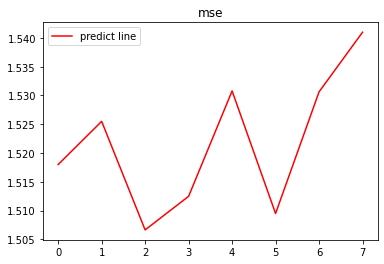

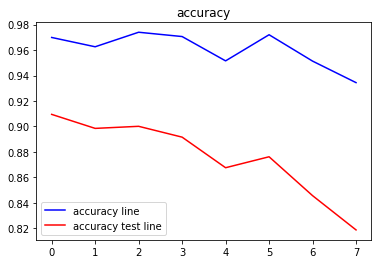

In [11]:
from tqdm.notebook import tnrange, tqdm_notebook

depth_list = []
loss_list = []
correct_list = []
correct_list_test = []
mlp1 = MLP1() # on cpu

former_list = [
    ('fc1', nn.Linear(28 * 28, 50)),  # hidden layer1
    ('bn1', nn.BatchNorm1d(50)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(50, 30)),  # hidden layer2
    ('bn2', nn.BatchNorm1d(30)),
    ('relu2', nn.ReLU())
]


latter_list = [
    ('fc3', nn.Linear(30, 10)), # output layer
    ('softmax1', nn.Softmax(dim=1))
]

mid_list = []

for layer in tnrange(0, 8, 1, desc='depth'):
    mid_list.append(('add_fc' + str(layer), nn.Linear(30, 30)))
    mid_list.append(('add_bn' + str(layer), nn.BatchNorm1d(30)))
    mid_list.append(('add_relu' + str(layer), nn.ReLU()))

    l = nn.Sequential(OrderedDict(former_list + mid_list + latter_list))

    # change the width of the layer
    mlp1.cpu() # move to cpu to prepare for the modification of layers
    mlp1.model = l
    mlp1.cuda() # move back to gpu
    # print(mlp1)

    loss, correct_rate, correct_test_rate = avg(mlp1, 
        X_train, Y_train, X_test, Y_test, epochs = 500, times=15)
            
    print(f"in {layer}: loss is {loss}, accu is {correct_rate}, test rate is {correct_test_rate}")
    depth_list.append(layer)
    loss_list.append(loss)
    correct_list.append(correct_rate)
    correct_list_test.append(correct_test_rate)

fig, ax = plt.subplots()
sns.lineplot(x=depth_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=depth_list, y=correct_list, color='blue', label='accuracy line', ax=ax)
sns.lineplot(x=depth_list, y=correct_list_test, color='red', label='accuracy test line', ax=ax)
plt.title(f"accuracy")
plt.show()

depth of layer 2
----------------------
with dropout

in 0: loss is 1.6713512182235717, accu is 0.8312222222222222, test rate is 0.7868333333333333
in 1: loss is 1.7287497361501059, accu is 0.7735777777777778, test rate is 0.7301666666666667
in 2: loss is 1.7609881162643433, accu is 0.7290055555555557, test rate is 0.6904
in 3: loss is 1.8151391665140788, accu is 0.6592166666666667, test rate is 0.6316
in 4: loss is 1.8353617032368978, accu is 0.6389666666666666, test rate is 0.6061999999999999
in 5: loss is 1.9135332266489664, accu is 0.5691055555555556, test rate is 0.5427666666666666
in 6: loss is 1.9051562070846557, accu is 0.5769, test rate is 0.5540666666666667
in 7: loss is 1.9770716746648154, accu is 0.49276111111111115, test rate is 0.4717000000000001



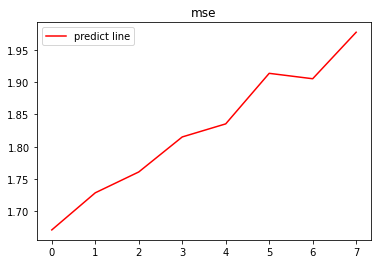

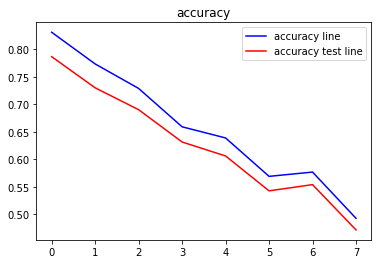

In [13]:
from tqdm.notebook import tnrange, tqdm_notebook

depth_list = []
loss_list = []
correct_list = []
correct_list_test = []
mlp1 = MLP1() # on cpu

former_list = [
    ('do1', nn.Dropout(0.1)),
    ('fc1', nn.Linear(28 * 28, 50)),  # hidden layer1
    ('bn1', nn.BatchNorm1d(50)),
    ('relu1', nn.ReLU()),
    ('do2', nn.Dropout(0.1)),
    ('fc2', nn.Linear(50, 30)),  # hidden layer2
    ('bn2', nn.BatchNorm1d(30)),
    ('relu2', nn.ReLU())
]


latter_list = [
    ('do3', nn.Dropout(0.1)),
    ('fc3', nn.Linear(30, 10)), # output layer
    ('softmax1', nn.Softmax(dim=1))
]

mid_list = []

for layer in tnrange(0, 8, 1, desc='depth'):
    mid_list.append(('add_do' + str(layer), nn.Dropout(0.1)))
    mid_list.append(('add_fc' + str(layer), nn.Linear(30, 30)))
    mid_list.append(('add_bn' + str(layer), nn.BatchNorm1d(30)))
    mid_list.append(('add_relu' + str(layer), nn.ReLU()))

    l = nn.Sequential(OrderedDict(former_list + mid_list + latter_list))

    # change the width of the layer
    mlp1.cpu() # move to cpu to prepare for the modification of layers
    mlp1.model = l
    mlp1.cuda() # move back to gpu
    # print(mlp1)

    loss, correct_rate, correct_test_rate = avg(mlp1, 
        X_train, Y_train, X_test, Y_test, epochs = 500, times=15)
            
    print(f"in {layer}: loss is {loss}, accu is {correct_rate}, test rate is {correct_test_rate}")
    depth_list.append(layer)
    loss_list.append(loss)
    correct_list.append(correct_rate)
    correct_list_test.append(correct_test_rate)

fig, ax = plt.subplots()
sns.lineplot(x=depth_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=depth_list, y=correct_list, color='blue', label='accuracy line', ax=ax)
sns.lineplot(x=depth_list, y=correct_list_test, color='red', label='accuracy test line', ax=ax)
plt.title(f"accuracy")
plt.show()

Evaluation
=============
we use the best practice MLP to evaluate  
First build the architecture

In [8]:
mlp1 = MLP1()
mlp1.cpu() # move to cpu to prepare for the modification of layers
mlp1.model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(28 * 28, 500)),  # hidden layer1
    ('bn1', nn.BatchNorm1d(500)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(500, 30)),  # hidden layer2
    ('bn2', nn.BatchNorm1d(30)),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(30, 10)), # output layer
    ('softmax1', nn.Softmax(dim=1))
    ]))
mlp1.cuda() # move back to gpu

MLP1(
  (model): Sequential(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (bn1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (fc2): Linear(in_features=500, out_features=30, bias=True)
    (bn2): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (fc3): Linear(in_features=30, out_features=10, bias=True)
    (softmax1): Softmax(dim=1)
  )
  (ce): CrossEntropyLoss()
)

train it

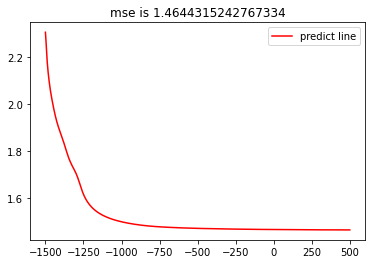

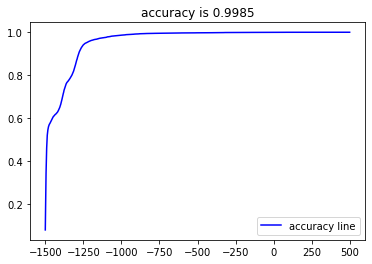

In [9]:

epoch = 2000
optimizer = optim.SGD(mlp1.parameters(), lr=0.1)
epoch_list = []
loss_list = []
accu_list = []

while(epoch > 0):
    optimizer.zero_grad()
    out = mlp1(X_train)
    loss = mlp1.loss(out, Y_train)
    loss.backward()
    optimizer.step()  # updates parameters

    pred = out.data.max(1, keepdim=False)[1]
    correct = pred.eq(Y_train.data.view_as(pred)).detach().sum()
    correct_rate = correct.detach().item() / X_train.size()[0]

    epoch_list.append((500-epoch))
    loss_list.append(loss.item())
    accu_list.append(correct_rate)

    epoch -= 1

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse is {loss}")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=accu_list, color='blue', label='accuracy line', ax=ax)
plt.title(f"accuracy is {correct_rate}")
plt.show()


In [10]:
Y_test_full = torch.from_numpy(Y_test_numpy).type(torch.long).cuda()
X_test_full = torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 255).cuda()

In [11]:
out = mlp1(X_test_full)
pred = out.data.max(1, keepdim=False)[1]
correct = pred.eq(Y_test_full.data.view_as(pred)).detach().sum()
correct_rate = correct.detach().item() / X_test_full.size()[0]
correct_rate

0.9618

In [25]:
pred_numpy = pred.cpu().detach().numpy()

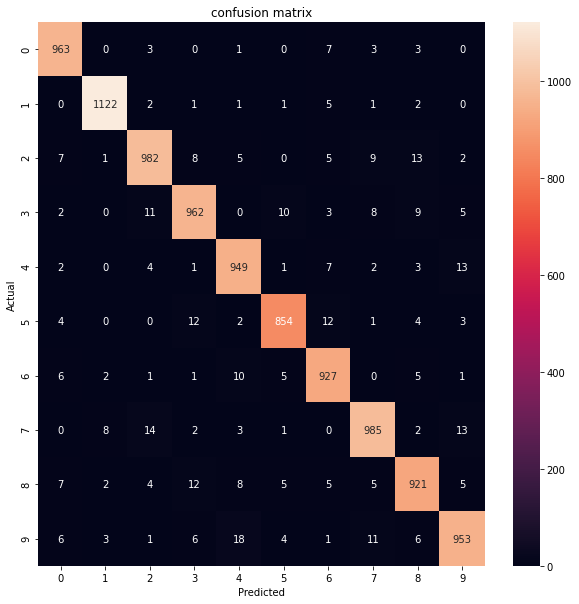

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.95      0.96      1032
           3       0.96      0.95      0.95      1010
           4       0.95      0.97      0.96       982
           5       0.97      0.96      0.96       892
           6       0.95      0.97      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat = confusion_matrix(Y_test_numpy, pred_numpy)
plt.subplots(figsize=(len(label), len(label)))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label, yticklabels=label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

print(classification_report(Y_test_numpy, pred_numpy, labels=label))